In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


#1) Data Processing

The data has been collected and precleaned directly from NY Open data (provided by NYPD)

In [ ]:
vehicle = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Vehicles.csv')
crash = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')
person = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Person.csv')



Add variables to identify larger vehicles and smaller vehicles

In [ ]:
#Create seperate variables of public and personal vehicle drivers
vehicle['PUBLIC_TRANSPORTATION'] = np.where(vehicle['VEHICLE_MAKE'].str.contains('BUS|TRUCK', case=False, na=False), 1, 0)
vehicle['PERSONAL_VEHICLE'] = np.where(vehicle['VEHICLE_MAKE'].str.contains('CAR|SUV', case=False, na=False), 1, 0)


In [ ]:
#vehicle = vehicle[vehicle['VEHICLE_MAKE'].notna() & vehicle['VEHICLE_MAKE'].str.contains('CAR|SUV|BUS|TRUCK', case=False)]


a) Merge data

In [ ]:
#merge person with crash
df = pd.merge(person, crash, on='COLLISION_ID', how='inner')


In [ ]:
#merge the rest with vehicle
df = pd.merge(df, vehicle, left_on='VEHICLE_ID', right_on='UNIQUE_ID', how='inner')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81691 entries, 0 to 81690
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   UNIQUE_ID_x                  81691 non-null  int64 
 1   COLLISION_ID                 81691 non-null  int64 
 2   CRASH_DATE                   81691 non-null  object
 3   CRASH_TIME                   81691 non-null  object
 4   VEHICLE_ID                   81691 non-null  int64 
 5   PERSON_AGE                   81691 non-null  int64 
 6   SAFETY_EQUIPMENT             81691 non-null  object
 7   PERSON_SEX                   81691 non-null  object
 8   BOROUGH                      81691 non-null  object
 9   NUMBER OF PERSONS INJURED    81691 non-null  int64 
 10  NUMBER OF PERSONS KILLED     81691 non-null  int64 
 11  UNIQUE_ID_y                  81691 non-null  int64 
 12  STATE_REGISTRATION           81524 non-null  object
 13  VEHICLE_MAKE                 81

In [ ]:
"""
# If it's not already, convert the 'BOROUGH' column to a string type
df['BOROUGH'] = df['BOROUGH'].astype(str)

# Create dummy variables for the 'BOROUGH' column
borough_dummies = pd.get_dummies(df['BOROUGH'], prefix='BOROUGH')

# Concatenate the dummy variables back to the original DataFrame
df = pd.concat([df, borough_dummies], axis=1)"""

"\n# If it's not already, convert the 'BOROUGH' column to a string type\ndf['BOROUGH'] = df['BOROUGH'].astype(str)\n\n# Create dummy variables for the 'BOROUGH' column\nborough_dummies = pd.get_dummies(df['BOROUGH'], prefix='BOROUGH')\n\n# Concatenate the dummy variables back to the original DataFrame\ndf = pd.concat([df, borough_dummies], axis=1)"

#2) Feature Engineering

In [ ]:
# Create the 'casualty' column to identify level of casualty
df['CASUALTY'] = df.apply(lambda row: "YES" if (row['NUMBER OF PERSONS INJURED'] >= 1) or (row['NUMBER OF PERSONS KILLED'] >= 1) else "NO", axis=1)


In [ ]:

# Convert the 'CRASH_DATE' column to a datetime type
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Create a new column 'VEHICLE_AGE' to store the calculated vehicle age
df['VEHICLE_AGE'] = df['CRASH_DATE'].dt.year - df['VEHICLE_YEAR']

# Set vehicle age to 0 if VEHICLE_YEAR is greater than CRASH_DATE
df.loc[df['VEHICLE_YEAR'] > df['CRASH_DATE'].dt.year, 'VEHICLE_AGE'] = 0

# Drop'VEHICLE_YEAR'
df.drop('VEHICLE_YEAR', axis=1, inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81691 entries, 0 to 81690
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   UNIQUE_ID_x                  81691 non-null  int64         
 1   COLLISION_ID                 81691 non-null  int64         
 2   CRASH_DATE                   81691 non-null  datetime64[ns]
 3   CRASH_TIME                   81691 non-null  object        
 4   VEHICLE_ID                   81691 non-null  int64         
 5   PERSON_AGE                   81691 non-null  int64         
 6   SAFETY_EQUIPMENT             81691 non-null  object        
 7   PERSON_SEX                   81691 non-null  object        
 8   BOROUGH                      81691 non-null  object        
 9   NUMBER OF PERSONS INJURED    81691 non-null  int64         
 10  NUMBER OF PERSONS KILLED     81691 non-null  int64         
 11  UNIQUE_ID_y                  81691 non-nu

In [ ]:
#df.to_csv('/content/output.csv', index=False)


In [ ]:
# Drop unused features
columns_to_drop = [0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 16]
df = df.drop(df.columns[columns_to_drop], axis=1)


<Axes: xlabel='CASUALTY', ylabel='count'>

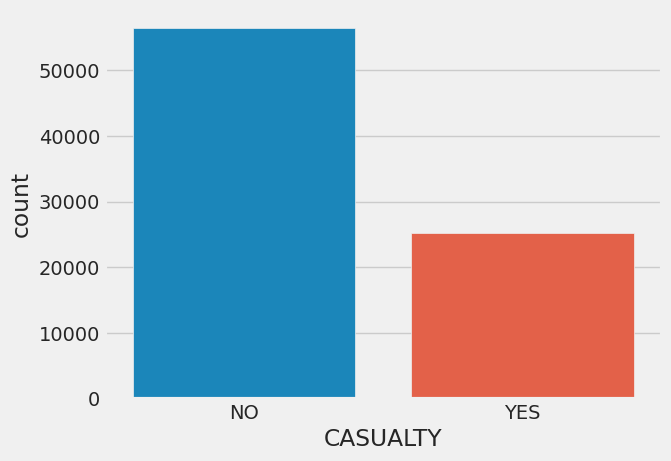

In [ ]:
#Checking if target class suffer from significant imbalance
sns.countplot(x='CASUALTY', data=df)

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

#convert attrition to numeric variable
#df['casualty'] = df.casualty.astype("category").cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81691 entries, 0 to 81690
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PERSON_AGE             81691 non-null  int64 
 1   SAFETY_EQUIPMENT       81691 non-null  object
 2   PERSON_SEX             81691 non-null  object
 3   BOROUGH                81691 non-null  object
 4   TRAVEL_DIRECTION       81691 non-null  object
 5   DRIVER_LICENSE_STATUS  79706 non-null  object
 6   PRE_CRASH              81691 non-null  object
 7   PUBLIC_TRANSPORTATION  81691 non-null  int64 
 8   PERSONAL_VEHICLE       81691 non-null  int64 
 9   CASUALTY               81691 non-null  object
 10  VEHICLE_AGE            81691 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 7.5+ MB


In [ ]:
"""import pandas as pd
from sklearn.preprocessing import StandardScaler

# You can select only the columns that need to be standardized (numerical features)
#numerical_features = ['PERSON_AGE', 'VEHICLE_YEAR']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical features using StandardScaler
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# The DataFrame 'df' now has the standardized numerical features"""


"import pandas as pd\nfrom sklearn.preprocessing import StandardScaler\n\n# You can select only the columns that need to be standardized (numerical features)\n#numerical_features = ['PERSON_AGE', 'VEHICLE_YEAR']\n\n# Initialize the StandardScaler\nscaler = StandardScaler()\n\n# Fit and transform the selected numerical features using StandardScaler\n#df[numerical_features] = scaler.fit_transform(df[numerical_features])\n\n# The DataFrame 'df' now has the standardized numerical features"

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

df['CASUALTY'] = df.CASUALTY.astype("category").cat.codes

In [ ]:
categorical_col.remove('CASUALTY')


In [ ]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
df = pd.get_dummies(df, columns=categorical_col)
df.info()

"""
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81691 entries, 0 to 81690
Data columns (total 59 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   PERSON_AGE                                                 81691 non-null  int64
 1   PUBLIC_TRANSPORTATION                                      81691 non-null  int64
 2   PERSONAL_VEHICLE                                           81691 non-null  int64
 3   CASUALTY                                                   81691 non-null  int8 
 4   VEHICLE_AGE                                                81691 non-null  int64
 5   SAFETY_EQUIPMENT_Air Bag Deployed                          81691 non-null  uint8
 6   SAFETY_EQUIPMENT_Air Bag Deployed/Child Restraint          81691 non-null  uint8
 7   SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt                 81691 non-null  uint8
 8   SAFETY_EQUIPMENT_Air Bag D

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel = LabelEncoder()\nfor column in categorical_col:\n    df[column] = label.fit_transform(df[column])'

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'uint8'])

# Find the column name for "casualty"
casualty_column_name = "CASUALTY"

# Calculate the correlation with other variables
correlation_casualty = numerical_columns.corrwith(df[casualty_column_name])
print(correlation_casualty)


PERSON_AGE                                                  -0.028205
PUBLIC_TRANSPORTATION                                       -0.085127
PERSONAL_VEHICLE                                             0.050941
VEHICLE_AGE                                                  0.033411
SAFETY_EQUIPMENT_Air Bag Deployed                            0.040999
SAFETY_EQUIPMENT_Air Bag Deployed/Child Restraint            0.005225
SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt                   0.022207
SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt/Harness           0.058881
SAFETY_EQUIPMENT_Child Restraint Only                       -0.003183
SAFETY_EQUIPMENT_Harness                                    -0.003430
SAFETY_EQUIPMENT_Helmet (Motorcycle Only)                    0.079474
SAFETY_EQUIPMENT_Helmet Only (In-Line Skater/Bicyclist)      0.017740
SAFETY_EQUIPMENT_Helmet/Other (In-Line Skater/Bicyclist)     0.011737
SAFETY_EQUIPMENT_Lap Belt                                    0.004418
SAFETY_EQUIPMENT_Lap

In [ ]:
# Define the target column name
target_column_name = "CASUALTY"

# Filter columns with negative correlation with the target column
negative_corr_cols = df.columns[df.corr()[target_column_name] < 0]

# Drop the columns with negative correlation
df = df.drop(negative_corr_cols, axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81691 entries, 0 to 81690
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   PERSONAL_VEHICLE                                          81691 non-null  int64
 1   CASUALTY                                                  81691 non-null  int8 
 2   VEHICLE_AGE                                               81691 non-null  int64
 3   SAFETY_EQUIPMENT_Air Bag Deployed                         81691 non-null  uint8
 4   SAFETY_EQUIPMENT_Air Bag Deployed/Child Restraint         81691 non-null  uint8
 5   SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt                81691 non-null  uint8
 6   SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt/Harness        81691 non-null  uint8
 7   SAFETY_EQUIPMENT_Helmet (Motorcycle Only)                 81691 non-null  uint8
 8   SAFETY_EQUIPMENT_Helmet Only (In-Lin

Data Training
Setting 0.1 test size to minize the chance of overfitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CASUALTY', axis=1)
y = df.CASUALTY

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#3) Machine Learning Model

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.30%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.757309      0.806070  0.763034      0.781690      0.772368
recall         0.967057      0.306439  0.763034      0.636748      0.763034
f1-score       0.849426      0.444062  0.763034      0.646744      0.724235
support    50815.000000  22706.000000  0.763034  73521.000000  73521.000000
_______________________________________________
Confusion Matrix: 
 [[49141  1674]
 [15748  6958]]

Test Result:
Accuracy Score: 66.07%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.697723     0.410816   0.66071     0.554270      0.606981
recall        0.888829     0.167570   0.66071     0.528199      0.660710
f1-score      0.781767     0.238043   0.66071     0.509905      0.609798
support    55

Tree visualization

In [ ]:
"""from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("casualty")"""

'from IPython.display import Image\nfrom six import StringIO\nfrom sklearn.tree import export_graphviz\nimport pydot\n\nfeatures = list(df.columns)\nfeatures.remove("casualty")'

In [ ]:
"""dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())"""

'dot_data = StringIO()\nexport_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())\nImage(graph[0].create_png())'

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.30%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.764621      0.753333   0.76302      0.758977      0.761135
recall         0.949385      0.345944   0.76302      0.647664      0.763020
f1-score       0.847045      0.474150   0.76302      0.660597      0.731881
support    50815.000000  22706.000000   0.76302  73521.000000  73521.000000
_______________________________________________
Confusion Matrix: 
 [[48243  2572]
 [14851  7855]]

Test Result:
Accuracy Score: 65.29%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.696822     0.393581  0.652876     0.545202      0.600913
recall        0.871464     0.180341  0.652876     0.525902      0.652876
f1-score      0.774419     0.247346  0.652876     0.510883      0.607717
support    55

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.ensemble import RandomForestClassifier

# Create and fit the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Calculate feature importances
features = X_train.columns
importances = rf_clf.feature_importances_

# Sort features and importances
sorted_indices = importances.argsort()[::-1]  # Reverse the order to get highest importances first
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Select top 20 features
top_features = sorted_features[:20]
top_importances = sorted_importances[:20]

# Create a bar chart trace
trace2 = go.Bar(
    x=top_importances,
    y=top_features,
    marker=dict(
        color=top_importances,
        colorscale='Viridis',
        reversescale=True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

# Define layout
layout = dict(
    title='Top 20 Feature Importances',
    width=700,
    height=700,  # Adjust the height to fit the top 20 features comfortably
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        autorange="reversed"
    ),
    margin=dict(
        l=300,
    ),
)

# Create a figure and update layout
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)

# Display the plot
py.iplot(fig1, filename='top_feature_importance_plot')



In [ ]:
print(top_features)

['VEHICLE_AGE', 'PRE_CRASH_Going Straight Ahead', 'PRE_CRASH_Making Left Turn', 'PERSON_SEX_F', 'SAFETY_EQUIPMENT_Lap Belt & Harness', 'TRAVEL_DIRECTION_West', 'PERSONAL_VEHICLE', 'TRAVEL_DIRECTION_South', 'TRAVEL_DIRECTION_East', 'BOROUGH_QUEENS', 'SAFETY_EQUIPMENT_Lap Belt', 'BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'SAFETY_EQUIPMENT_Helmet (Motorcycle Only)', 'PRE_CRASH_Stopped in Traffic', 'DRIVER_LICENSE_STATUS_Unlicensed', 'BOROUGH_STATEN ISLAND', 'DRIVER_LICENSE_STATUS_Permit', 'PRE_CRASH_Slowing or Stopping', 'SAFETY_EQUIPMENT_Air Bag Deployed/Lap Belt/Harness']


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create the logistic regression classifier
logreg_clf = LogisticRegression()

logreg_clf.fit(X_train, y_train)

# Function to print scores
def print_scores(y_true, y_pred, prefix):
    print(f"{prefix} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{prefix} Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"{prefix} Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"{prefix} F1 Score: {f1_score(y_true, y_pred):.4f}")
    print()

# Evaluate and print scores for the training set
y_train_pred = logreg_clf.predict(X_train)
print_scores(y_train, y_train_pred, "Training")

# Evaluate and print scores for the test set
y_test_pred = logreg_clf.predict(X_test)
print_scores(y_test, y_test_pred, "Test")

print_score(logreg_clf, X_train, y_train, X_test, y_test, train=True)
print_score(logreg_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy: 0.6976
Training Precision: 0.6389
Training Recall: 0.0479
Training F1 Score: 0.0891

Test Accuracy: 0.6905
Test Precision: 0.6410
Test Recall: 0.0484
Test F1 Score: 0.0900

Train Result:
Accuracy Score: 69.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.698989      0.638873  0.697597      0.668931      0.680423
recall         0.987897      0.047917  0.697597      0.517907      0.697597
f1-score       0.818703      0.089147  0.697597      0.453925      0.593389
support    50815.000000  22706.000000  0.697597  73521.000000  73521.000000
_______________________________________________
Confusion Matrix: 
 [[50200   615]
 [21618  1088]]

Test Result:
Accuracy Score: 69.05%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.691661     0.641026  0.6

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Function to print scores


print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf , X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 71.14%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.712440      0.692926  0.711416      0.702683      0.706413
recall         0.976680      0.117766  0.711416      0.547223      0.711416
f1-score       0.823892      0.201318  0.711416      0.512605      0.631618
support    50815.000000  22706.000000  0.711416  73521.000000  73521.000000
_______________________________________________
Confusion Matrix: 
 [[49630  1185]
 [20032  2674]]

Test Result:
Accuracy Score: 69.06%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.697698     0.564220  0.690575     0.630959      0.655482
recall        0.965986     0.095201  0.690575     0.530594      0.690575
f1-score      0.810210     0.162914  0.690575     0.486562      0.605484
support    55

In [ ]:
"""#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)"""

'#import KNeighborsClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\n\n#Setup arrays to store training and test accuracies\nneighbors = np.arange(1,21)\ntrain_accuracy =np.empty(len(neighbors))\ntest_accuracy = np.empty(len(neighbors))\n\nfor i,k in enumerate(neighbors):\n    #Setup a knn classifier with k neighbors\n    knn = KNeighborsClassifier(n_neighbors=k)\n\n    #Fit the model\n    knn.fit(X_train, y_train)\n\n    #Compute accuracy on the training set\n    train_accuracy[i] = knn.score(X_train, y_train)\n\n    #Compute accuracy on the test set\n    test_accuracy[i] = knn.score(X_test, y_test)'

In [ ]:
"""#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()"""

"#Generate plot\nplt.title('k-NN Varying number of neighbors')\nplt.plot(neighbors, test_accuracy, label='Testing Accuracy')\nplt.plot(neighbors, train_accuracy, label='Training accuracy')\nplt.legend()\nplt.xlabel('Number of neighbors')\nplt.ylabel('Accuracy')\nplt.show()"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd


# Create the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=20)
# Train the classifier on the training data
knn_clf.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train, pred)}\n")

    elif not train:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred)}\n")

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 70.06%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.705982      0.596667   0.70063      0.651325      0.672222
recall         0.971426      0.094601   0.70063      0.533013      0.700630
f1-score       0.817701      0.163309   0.70063      0.490505      0.615601
support    50815.000000  22706.000000   0.70063  73521.000000  73521.000000
_______________________________________________
Confusion Matrix:
[[49363  1452]
 [20558  2148]]

Test Result:
Accuracy Score: 68.04%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.691614     0.466830  0.680416     0.579222      0.620520
recall        0.961153     0.073529  0.680416     0.517341      0.680416
f1-score      0.804405     0.127048  0.680416     0.465726      0.590171
support    5586

#4) FINAL RESULT AND MODEL COMPARISON

<ipython-input-38-337d35e98a7a>:34: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-38-337d35e98a7a>:34: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-38-337d35e98a7a>:34: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<ipython-in

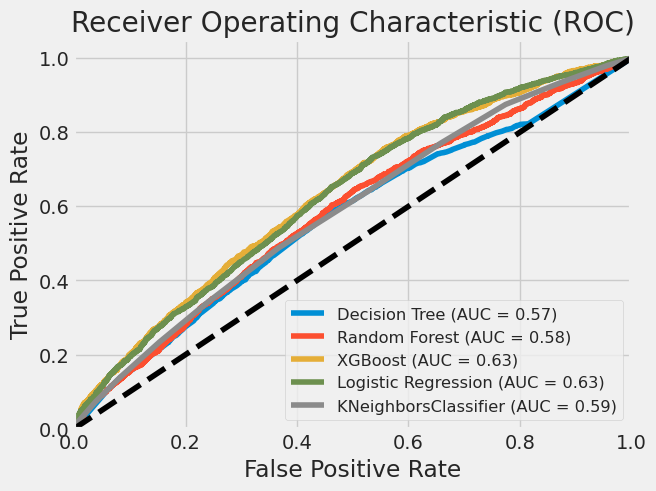

             Classifier  Accuracy  Precision  Recall  F1 Score  ROC AUC
0         Decision Tree      0.66       0.41    0.17      0.24     0.57
1         Random Forest      0.66       0.40    0.18      0.25     0.58
2               XGBoost      0.69       0.56    0.10      0.16     0.63
3   Logistic Regression      0.69       0.64    0.05      0.09     0.63
4  KNeighborsClassifier      0.68       0.47    0.07      0.13     0.59


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=20)
}

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

# Train, evaluate, and compare classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_scores = clf.predict_proba(X_test)[:, 1]

    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    roc_auc = round(roc_auc_score(y_test, y_scores), 2)

    metrics_df = metrics_df.append({
        "Classifier": clf_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }, ignore_index=True)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right", fontsize="small")

# Display the ROC curve plot
plt.show()

# Display the comparison table
print(metrics_df)


Coding References:

1) https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners/notebook#3.-Decision-Tree-&-Random-Forest-Implementation-in-python

2) https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

3) https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html